Registration number : 2010557

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_csv("D:\CE802\CE802_P3_Data\CE802_P3_Data.csv")
df1.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


In [3]:
#encoding the categorical variables
cat_enc = df1[['F4', 'F5']]
cat_enc = pd.get_dummies(data=cat_enc, drop_first=True)
cat_enc.head()

,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1


In [4]:
df = pd.concat([df1,cat_enc],axis=1)

In [5]:
#dropping the encoded variables
df=df.drop(['F4'], axis = 1)

In [6]:
df=df.drop(['F5'], axis = 1)

In [7]:
df.head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F15,F16,Target,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
0,-39.32,5.72,-13.83,0.03,-200.46,122.09,-2.96,6,2.67,8,...,10523.40,-635.80,1051.99,0,0,0,0,0,1,0
1,-29.38,8.20,-11.07,56.97,-427.78,74.25,-22.94,4,3.84,10,...,10037.04,-469.73,816.64,0,1,0,0,0,1,0
2,2.46,20.32,-7.59,45.00,-329.02,96.98,-10.90,4,13.14,8,...,15100.28,-662.31,3241.77,1,0,0,0,1,0,0
3,16.33,2.76,-8.40,0.12,-196.88,42.45,-12.16,12,1.29,6,...,22518.15,-1100.35,0.00,0,0,0,0,1,0,0
4,-14.93,9.98,-5.28,557.61,-249.50,76.25,-20.54,8,2.58,2,...,20111.46,-752.48,0.00,0,1,0,0,0,0,1


In [8]:
df.describe()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F15,F16,Target,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-14.758033,8.109187,-9.015460,190.808320,-186.426267,94.385960,-14.565747,7.885333,12.124980,7.894667,...,14992.228340,-719.008553,922.082533,0.206667,0.191333,0.193333,0.208000,0.271333,0.235333,0.253333
std,29.857614,5.812853,9.120078,2322.462888,84.482786,29.306812,6.048501,3.620072,8.681726,3.673405,...,4443.035539,301.420683,1092.331874,0.405049,0.393482,0.395044,0.406012,0.444796,0.424348,0.435065
min,-119.980000,0.080000,-38.130000,0.000000,-748.360000,4.700000,-33.420000,0.000000,0.120000,0.000000,...,-4769.490000,-1769.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-35.625000,3.815000,-14.955000,0.390000,-226.425000,74.740000,-18.800000,6.000000,5.835000,6.000000,...,12947.810000,-928.082500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-14.805000,6.740000,-9.330000,3.030000,-186.550000,93.580000,-14.560000,8.000000,10.245000,8.000000,...,14993.285000,-715.425000,429.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.290000,10.945000,-3.150000,20.415000,-144.280000,113.750000,-10.320000,10.000000,16.477500,10.000000,...,17228.420000,-518.160000,1530.205000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,103.960000,45.140000,21.180000,82423.590000,194.580000,196.840000,3.480000,20.000000,70.170000,22.000000,...,35345.740000,307.040000,3960.010000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

F1              0
F2              0
F3              0
F6              0
F7              0
F8              0
F9              0
F10             0
F11             0
F12             0
F13             0
F14             0
F15             0
F16             0
Target          0
F4_Low          0
F4_Medium       0
F4_Very high    0
F4_Very low     0
F5_Rest         0
F5_UK           0
F5_USA          0
dtype: int64

The dataset does not contain any missing values.

In [10]:
df.shape

(1500, 22)

In [11]:
df.dtypes

F1              float64
F2              float64
F3              float64
F6              float64
F7              float64
F8              float64
F9              float64
F10               int64
F11             float64
F12               int64
F13             float64
F14             float64
F15             float64
F16             float64
Target          float64
F4_Low            uint8
F4_Medium         uint8
F4_Very high      uint8
F4_Very low       uint8
F5_Rest           uint8
F5_UK             uint8
F5_USA            uint8
dtype: object

In [12]:
#seperating the input and target variables
df_input=df.drop(['Target'],axis=1)
df_target=df['Target']
print(df_input.head())
print(df_target.head())

      F1     F2     F3      F6      F7      F8     F9  F10    F11  F12  ...  \
0 -39.32   5.72 -13.83    0.03 -200.46  122.09  -2.96    6   2.67    8  ...   
1 -29.38   8.20 -11.07   56.97 -427.78   74.25 -22.94    4   3.84   10  ...   
2   2.46  20.32  -7.59   45.00 -329.02   96.98 -10.90    4  13.14    8  ...   
3  16.33   2.76  -8.40    0.12 -196.88   42.45 -12.16   12   1.29    6  ...   
4 -14.93   9.98  -5.28  557.61 -249.50   76.25 -20.54    8   2.58    2  ...   

     F14       F15      F16  F4_Low  F4_Medium  F4_Very high  F4_Very low  \
0  19.19  10523.40  -635.80       0          0             0            0   
1  12.65  10037.04  -469.73       0          1             0            0   
2  13.01  15100.28  -662.31       1          0             0            0   
3   9.19  22518.15 -1100.35       0          0             0            0   
4  18.44  20111.46  -752.48       0          1             0            0   

   F5_Rest  F5_UK  F5_USA  
0        0      1       0  
1     

Text(0, 0.5, 'Frequency')

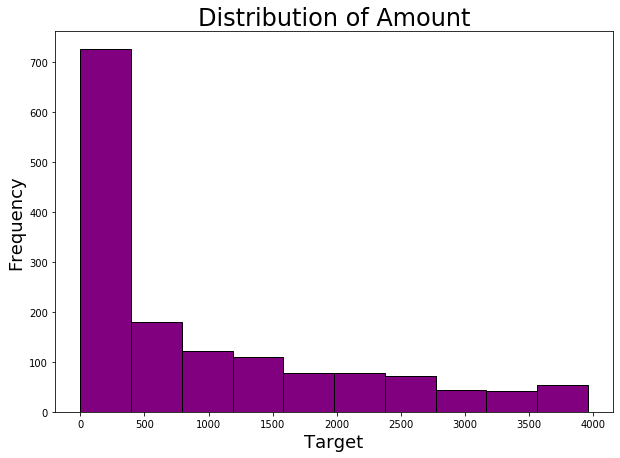

In [13]:
#histogram of the amount spent by the customers in may 2021
df.Target.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Amount', size=24)
plt.xlabel('Target', size=18)
plt.ylabel('Frequency', size=18)

In [14]:
#checking correlation among variables
df.corr()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F15,F16,Target,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
F1,1.000000,0.017902,-0.004979,-0.006548,0.002309,-0.012594,-0.012025,0.064451,-0.050148,-0.000822,...,-0.013438,0.061850,-0.015412,0.020880,0.026437,0.002943,0.024656,-0.013766,0.002369,0.052827
F2,0.017902,1.000000,0.018861,0.059413,0.026478,0.046542,0.037862,-0.013474,-0.022325,-0.028201,...,0.060349,0.012850,0.357137,0.042147,0.005945,0.011823,-0.023717,-0.029161,0.014971,-0.018869
F3,-0.004979,0.018861,1.000000,-0.014330,-0.008484,0.012457,-0.017546,-0.006276,-0.021228,-0.026931,...,-0.042207,0.039825,-0.011330,0.032147,-0.028772,0.008418,0.022267,0.019092,-0.036029,0.023105
F6,-0.006548,0.059413,-0.014330,1.000000,-0.027544,0.011987,0.032332,-0.013561,-0.005763,0.046442,...,0.066430,-0.040372,0.027713,-0.026531,-0.015921,0.013100,0.052144,-0.027263,-0.023508,0.050749
F7,0.002309,0.026478,-0.008484,-0.027544,1.000000,-0.009240,-0.031183,0.007359,0.014407,0.016949,...,-0.012488,0.016704,0.031407,0.027511,0.004579,0.006224,-0.012380,-0.003016,0.003473,0.025547
F8,-0.012594,0.046542,0.012457,0.011987,-0.009240,1.000000,0.000302,-0.011457,0.000099,-0.018839,...,0.007560,0.051243,0.430990,-0.024045,-0.031939,-0.000138,-0.012555,0.010444,-0.013182,0.000654
F9,-0.012025,0.037862,-0.017546,0.032332,-0.031183,0.000302,1.000000,-0.004793,0.009609,-0.002310,...,-0.006157,0.004091,0.020443,0.066768,-0.022820,-0.040894,-0.028270,-0.007310,-0.029612,0.068829
F10,0.064451,-0.013474,-0.006276,-0.013561,0.007359,-0.011457,-0.004793,1.000000,0.005589,0.006516,...,0.004620,0.002825,-0.236200,-0.027504,-0.040788,-0.001281,0.030762,-0.025410,-0.005872,-0.013735
F11,-0.050148,-0.022325,-0.021228,-0.005763,0.014407,0.000099,0.009609,0.005589,1.000000,0.003647,...,-0.007184,0.041882,0.346373,-0.024725,-0.013344,0.030851,-0.002469,0.026506,-0.010787,-0.035406
F12,-0.000822,-0.028201,-0.026931,0.046442,0.016949,-0.018839,-0.002310,0.006516,0.003647,1.000000,...,0.004651,-0.007670,0.193704,-0.051716,-0.006355,-0.028251,0.014700,-0.007810,0.006498,-0.012512


It can be observed that there is no high correlation among the variables

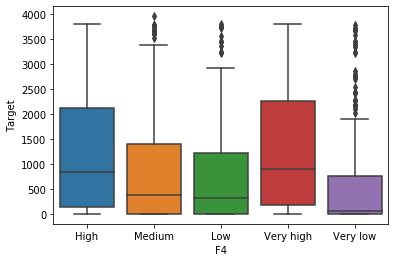

In [15]:
sns.boxplot(y='Target',x='F4',data=df1)

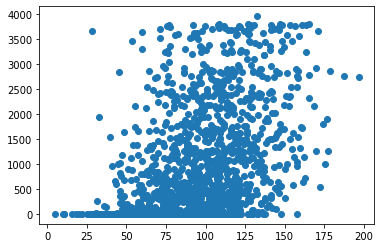

In [16]:
plt.scatter(df.F8, df.Target)

In [17]:
# splitting the given data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size=0.3,
                                                    random_state=10)

In [20]:
#importing the testing data set

df_test1=pd.read_csv("D:\CE802\CE802_P3_Data\CE802_P3_Test.csv")
df_test1.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [21]:
cat_enc_test = df_test1[['F4', 'F5']]
cat_enc_test = pd.get_dummies(data=cat_enc_test, drop_first=True)
cat_enc_test.head()

,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
0,0,0,1,0,0,1,0
1,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,1,0
4,0,1,0,0,0,0,1


In [22]:
df_test= pd.concat([df_test1,cat_enc_test],axis=1)
df_test=df_test.drop(['F4'], axis = 1)
df_test=df_test.drop(['F5'], axis = 1)

In [23]:
df_test.head()

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F15,F16,Target,F4_Low,F4_Medium,F4_Very high,F4_Very low,F5_Rest,F5_UK,F5_USA
0,-39.37,4.22,-4.05,83.43,-209.02,101.94,-17.16,2,7.89,10,...,30843.16,-962.72,NaN,0,0,1,0,0,1,0
1,-39.37,7.72,-3.48,48.30,86.62,107.56,-11.00,18,1.86,10,...,15657.13,-305.24,NaN,0,0,0,1,1,0,0
2,16.25,7.08,-5.31,1.98,-267.34,23.33,-14.66,8,25.92,6,...,10765.05,-857.16,NaN,0,0,0,1,0,0,0
3,23.08,5.82,-5.91,11.49,-196.52,115.19,-12.14,2,12.87,0,...,14778.80,-798.06,NaN,0,0,0,1,0,1,0
4,-21.30,15.14,-4.02,0.60,-80.36,75.42,-8.86,10,4.26,8,...,16328.25,-832.93,NaN,0,1,0,0,0,0,1


In [31]:
df_test_input=df_test.drop(['Target'],axis=1)
df_test_target=df_test['Target']
print(df_test_input.head())
print(df_test_target.head())

      F1     F2    F3     F6      F7      F8     F9  F10    F11  F12  ...  \
0 -39.37   4.22 -4.05  83.43 -209.02  101.94 -17.16    2   7.89   10  ...   
1 -39.37   7.72 -3.48  48.30   86.62  107.56 -11.00   18   1.86   10  ...   
2  16.25   7.08 -5.31   1.98 -267.34   23.33 -14.66    8  25.92    6  ...   
3  23.08   5.82 -5.91  11.49 -196.52  115.19 -12.14    2  12.87    0  ...   
4 -21.30  15.14 -4.02   0.60  -80.36   75.42  -8.86   10   4.26    8  ...   

     F14       F15     F16  F4_Low  F4_Medium  F4_Very high  F4_Very low  \
0  13.11  30843.16 -962.72       0          0             1            0   
1  11.71  15657.13 -305.24       0          0             0            1   
2  17.60  10765.05 -857.16       0          0             0            1   
3  13.59  14778.80 -798.06       0          0             0            1   
4  13.62  16328.25 -832.93       0          1             0            0   

   F5_Rest  F5_UK  F5_USA  
0        0      1       0  
1        1      0       

# LINEAR REGRESSION

In [24]:
model_reg=linear_model.LinearRegression(normalize=True)
model_reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [25]:
print(model_reg.score(X_test, y_test))

0.8056026205272881


In [27]:
#predictions on test set
pred_reg = model_reg.predict(X_test)
pred_reg[1:10]

array([ 271.98805806, -797.8096468 ,  633.03364881,  893.85841791,
       1273.23368589,  703.22005737, 1037.51104052,  368.29370585,
       1560.35846359])

In [28]:
from sklearn.metrics import r2_score
r_square=r2_score(y_test,pred_reg)
r_square

0.8056026205272881

Text(0, 0.5, 'Predictions')

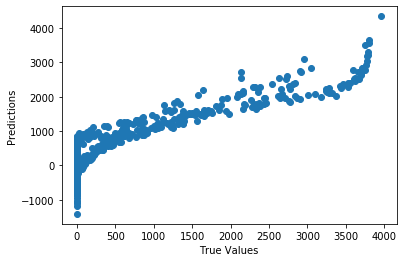

In [29]:
plt.scatter(y_test, pred_reg)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [32]:
#predictions on unseen data
predictions=model_reg.predict(df_test_input)
predictions[1:10]

array([  881.49044828,  -622.65209645,  1225.49910772,   347.35792104,
        1554.30923307, -1641.63383141,  1775.47657506,   -28.01830424,
         658.56773172])

In [35]:
print("Mean squared error of linear regression:",metrics.mean_squared_error(y_test, pred_reg))

Mean squared error of linear regression: 256174.53006926703


# RANDOM FOREST REGRESSOR

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [37]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)

In [39]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [40]:
best_rf_reg=RandomForestRegressor(random_state = 42,n_estimators=800,min_samples_split= 5,
                                  min_samples_leaf= 2,max_features= 'auto',bootstrap= True)

In [41]:
best_rf_reg.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=800,
                      random_state=42)

In [42]:
rf_reg_pred=best_rf_reg.predict(X_test)
rf_reg_pred[1:10]

array([ 154.04912105,  157.96558602,  840.6073282 ,  585.93313896,
       1098.33925555,  275.98220985, 1232.85823183,  813.84882757,
       1656.56707735])

In [43]:
#predictions on unseen test data
predictions_unseen_rf= best_rf_reg.predict(df_test_input)
predictions_unseen_rf

array([1109.56397827, 1471.77080884,  456.84133024, ...,   17.56660456,
       2583.98408691,  500.20109509])

In [44]:
print('Mean Squared Error of Random Forest Regressor:', metrics.mean_squared_error(y_test, rf_reg_pred))

Mean Squared Error of Random Forest Regressor: 434225.4025427875


# XGBOOST REGRESSOR

In [45]:
from numpy import asarray
from xgboost import XGBRegressor

In [46]:
model_xgb = XGBRegressor()

In [55]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model_xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = abs(scores)

In [48]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
pred_xgb = model_xgb.predict(X_test)

In [50]:
#predictions on unseen data
pred_test_xgb = model_xgb.predict(df_test_input)
pred_test_xgb

array([ 682.4083  , 1540.0295  ,   65.788055, ...,  228.30272 ,
       3223.6094  ,  525.19867 ], dtype=float32)

In [51]:
print('Mean Squared Error of XGBoost regressor:', metrics.mean_squared_error(y_test, pred_xgb))

Mean Squared Error of XGBoost regressor: 303769.33951614687


In [52]:
print("Mean squared error of linear regression:",metrics.mean_squared_error(y_test, pred_reg))
print('Mean Squared Error of Random Forest Regressor:', metrics.mean_squared_error(y_test, rf_reg_pred))
print('Mean Squared Error of XGBoost regressor:', metrics.mean_squared_error(y_test, pred_xgb))

Mean squared error of linear regression: 256174.53006926703
Mean Squared Error of Random Forest Regressor: 434225.4025427875
Mean Squared Error of XGBoost regressor: 303769.33951614687


linear regression is has better mse when compared to random forest regressor and xgboost regressor and hence can be used to predict the amount a new customer spends at Sunsbory's.

In [53]:
#copying the predictions of linear regression to test.csv file
df_test1['Target'] = predictions
df_test1.to_csv('CE802_P3_Test.csv')